In [1]:
import numpy as np
import os
import pandas as pd
import math
from matplotlib import pyplot as plt

In [2]:
vector_timesteps_file=[r'./velocity.0009.txt',r'./velocity.0019.txt',
                      r'./velocity.0029.txt',r'./velocity.0039.txt',
                       r'./velocity.0049.txt',r'./velocity.0059.txt',
                       r'./velocity.0069.txt',r'./velocity.0079.txt',
                       r'./velocity.0089.txt',r'./velocity.0099.txt'] 
X, Y= np.meshgrid(np.arange(0,600,1),np.arange(0,248,1))

C:\Users\urja\anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


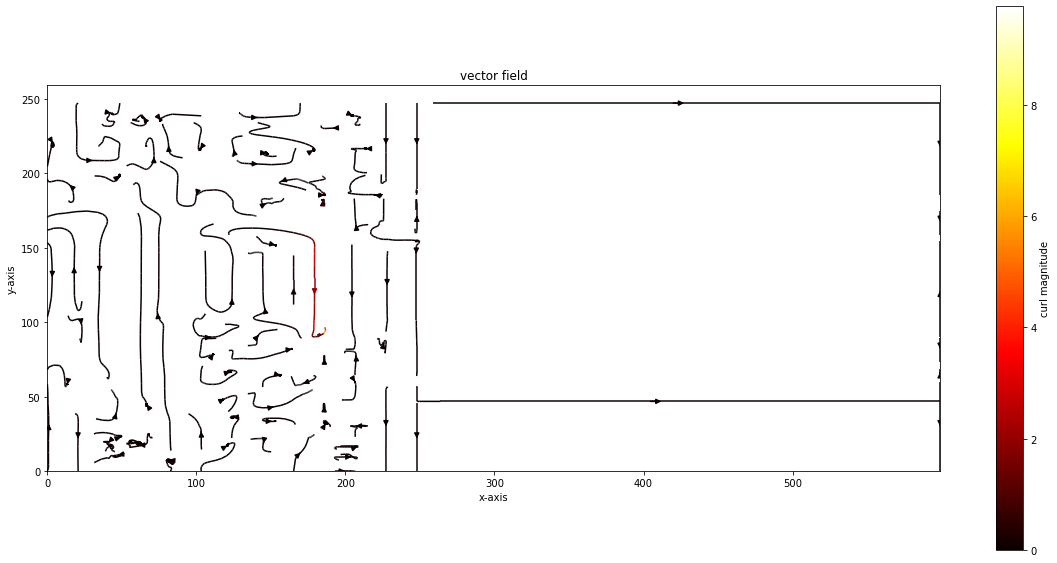

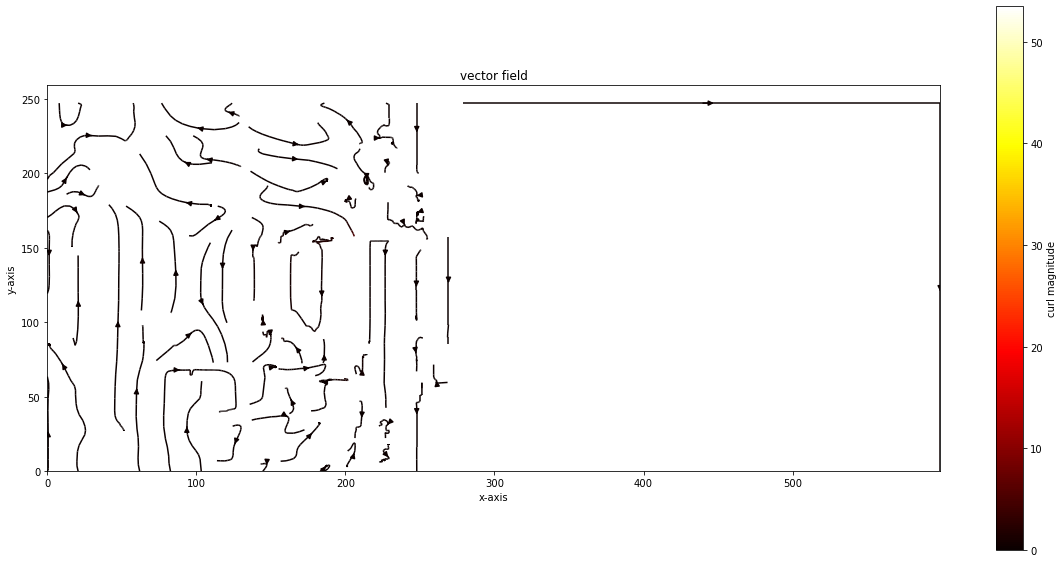

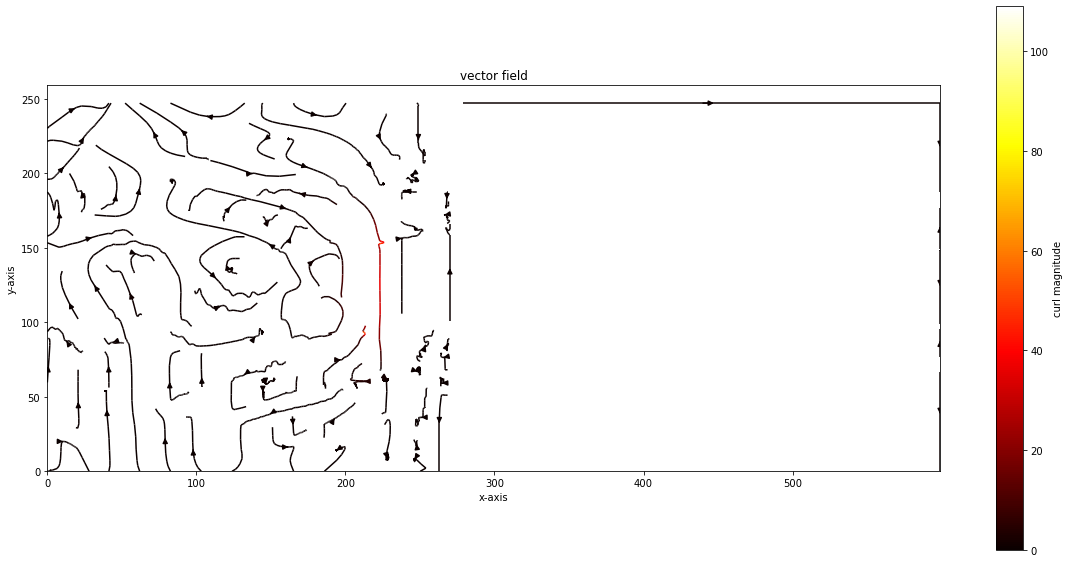

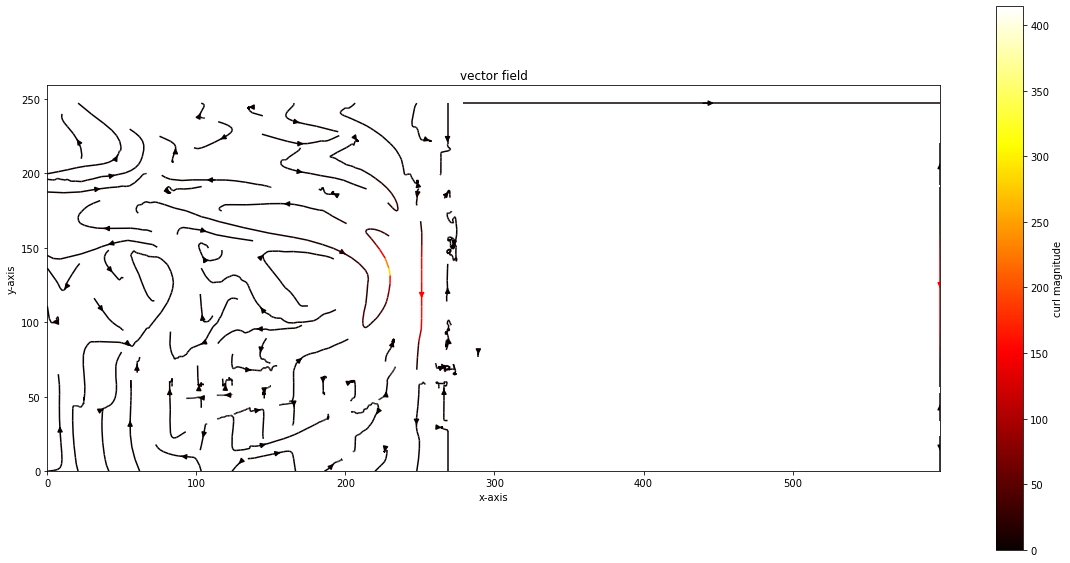

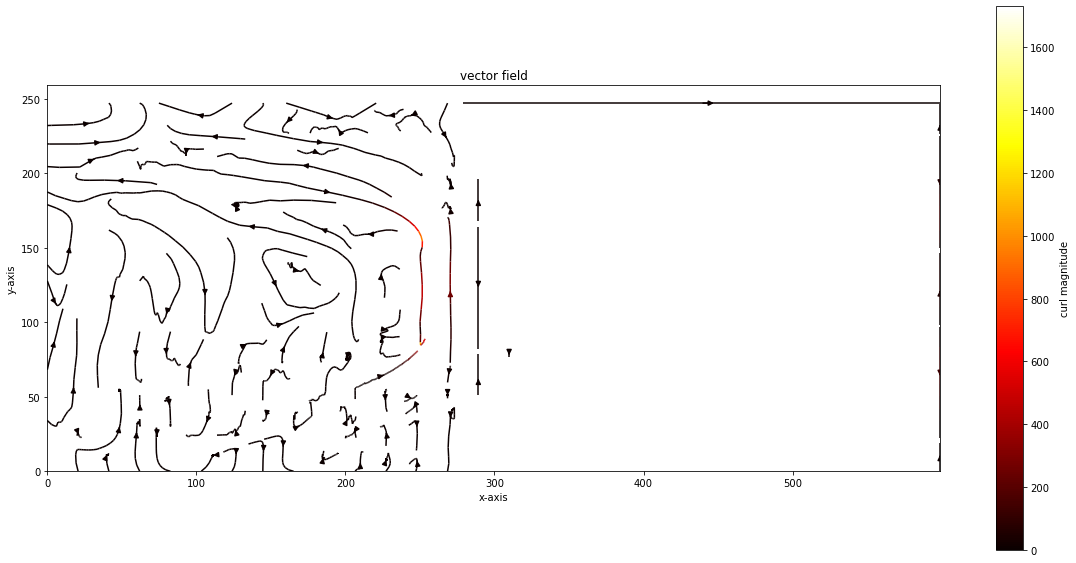

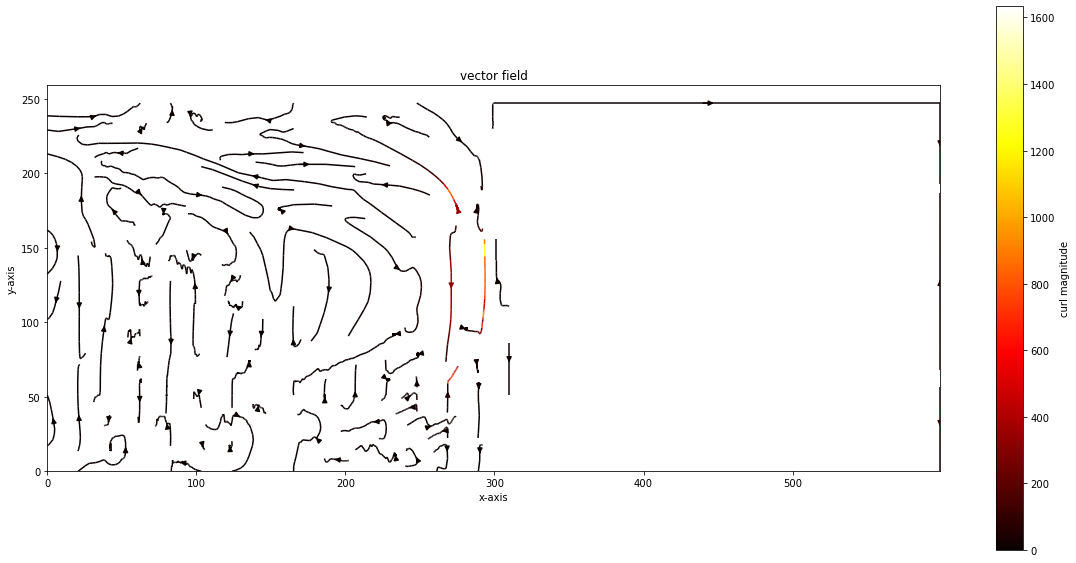

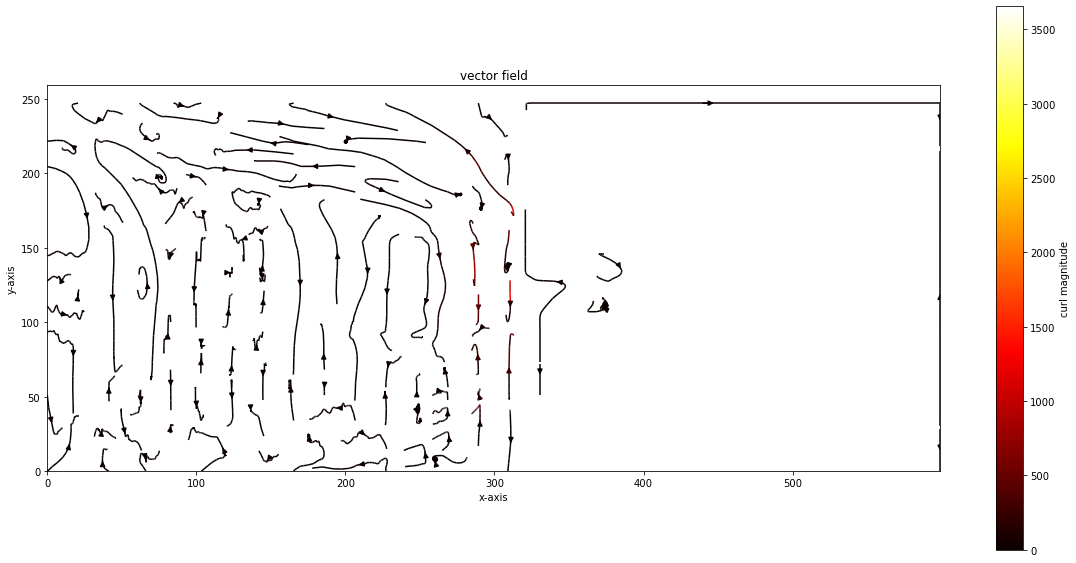

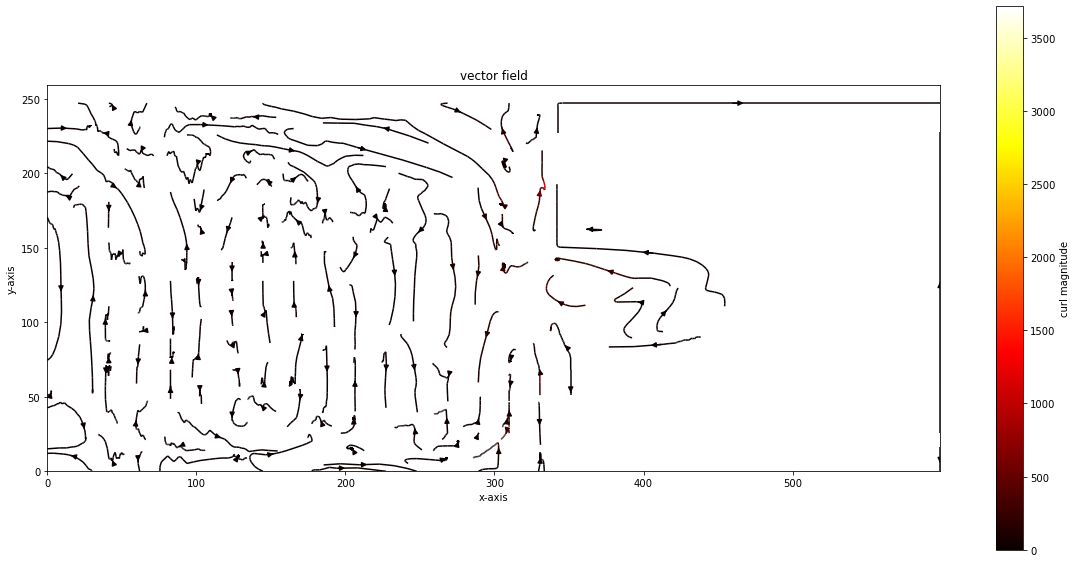

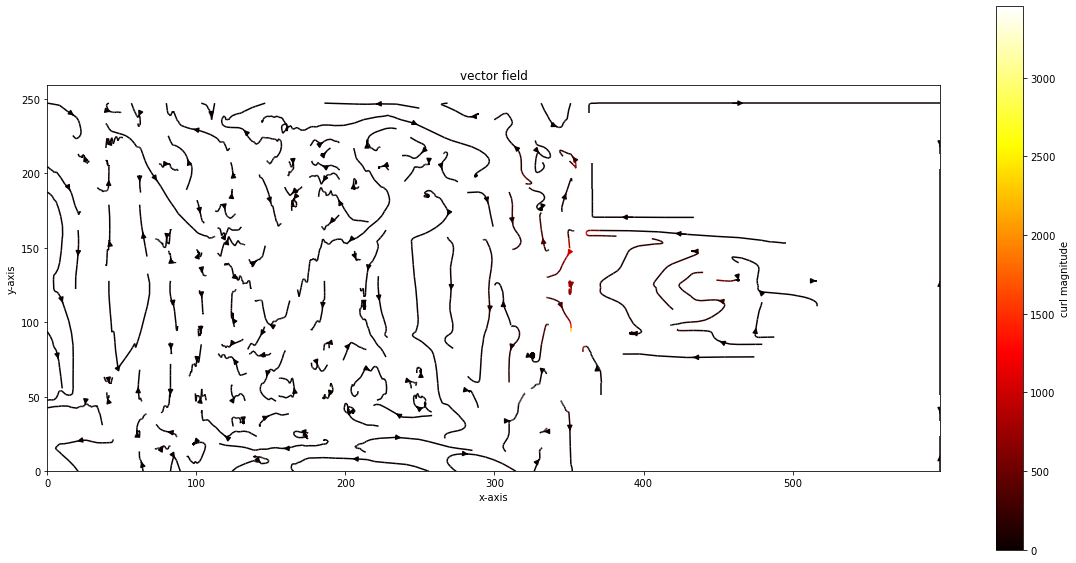

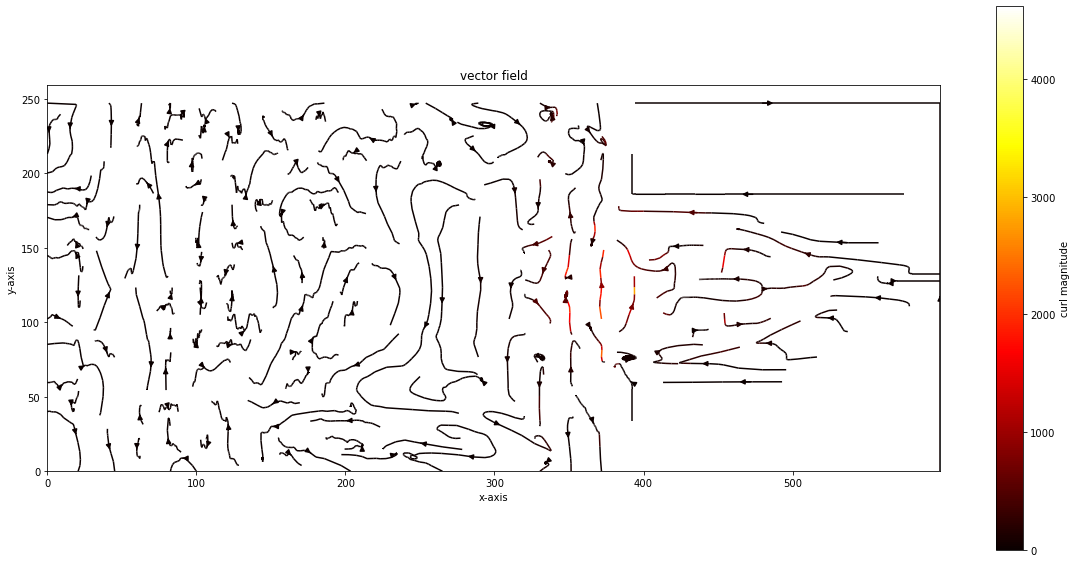

In [13]:
for time in range(len(vector_timesteps_file)):
  df = pd.read_csv(vector_timesteps_file[time], sep=" ", header=None ,skiprows=8184000, nrows=600*248*2) #z=60
  df = df.fillna(0).to_numpy()
  curl_x=[]
  curl_y=[]
  curl_z=[]
  curl_mag=[]
  for z in range(1):
    for y in range(248):
        for x in range(600):
            a = (df[x+600*(y+1)+600*248*z][2] - df[x+600*(y)+600*248*z][2]-df[x+600*(y)+600*248*(z+1)][1] +df[x+600*(y)+600*248*z][1])/0.001
            b = (df[x+600*(y)+600*248*(z+1)][0] - df[x+600*(y)+600*248*z][0]-df[(x+1)+600*(y)+600*248*(z)][2] + df[x+600*(y)+600*248*z][2])/0.001
            c = (df[(x+1)+600*(y)+600*248*z][1] - df[x+600*(y)+600*248*z][1]-df[x+600*(y+1)+600*248*(z)][0] +df[x+600*(y)+600*248*z][0])/0.001     
            mag= math.sqrt(a*a+b*b+c*c)
            curl_x.append(a)
            curl_y.append(b)
            curl_z.append(c)
            curl_mag.append(mag)
  ax = plt.figure(figsize=(20,10))
  plt.streamplot(X, Y, np.array(curl_x).reshape(248,600), np.array(curl_y).reshape(248,600),color=np.array(curl_mag).reshape(248,600),cmap = "hot")
  plt.axes().set_aspect('equal')
  plt.title("vector field")
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.colorbar(label="curl magnitude")
  plt.clim(min(curl_mag),max(curl_mag))
  plt.savefig('{}.jpg'.format('vector_field'+str(time)))

              
  #curl[0] = ( vel[x][y+1][z][2] - vel[x][y][z][2] - vel[x][y][z+1][1] + vel[x][y][z][1] ) / 0.001;
  #curl[1] = ( vel[x][y][z+1][0] - vel[x][y][z][0] - vel[x+1][y][z][2] + vel[x][y][z][2] ) / 0.001;
  #curl[2] = ( vel[x+1][y][z][1] - vel[x][y][z][1] - vel[x][y+1][z][0] + vel[x][y][z][0] ) / 0.001;          

In [14]:
import cv2
import glob
frameSize = (1440,720)
fourcc = cv2.VideoWriter_fourcc(*'H264')
out = cv2.VideoWriter('vector_field_streamlines.mp4',fourcc,2.0, frameSize)

for filename in glob.glob('./vector_field*.jpg'):
    img = cv2.imread(filename)
    out.write(img)

out.release()

In [15]:
from IPython.display import HTML
HTML("""
<video width="800" height="500" controls>
  <source src="./vector_field_streamlines.mp4" type="video/mp4">
</video>
""")